<a href="https://colab.research.google.com/github/vRodrigues22/Atividades__Fundamentos_da_Inteligencia_Computacional_e_Ciencias_de_Dados/blob/main/Atividade4_Programas_em_Python_(p_value_confidence_intervals_e_correlation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 4: Programas em Python (p-value, intervalos de confiança e correlação)

**Nome:** Valéria Oliveira Rodrigues

**Instituição:** Universidade Federal do Pará

**Curso:** Mestrado em Ciência da Computação / PPGCC

**Disciplina:** Fundamentos de Inteligência Computacional e Ciência Dados

## 🔹 Parte A - Análise de Correlação e Regressão Linear

- Explorar a correlação entre dois conjuntos de dados, aplicar uma regressão linear simples para ajustar uma linha reta aos dados e interpretar os resultados de acordo com o valor de R² (coeficiente de determinação), p-valor e covariância.

# Gráfico 1 - Correlação Forte:
Slope (Coeficiente angular): 1.00
Intercepto: 0.00
R² (Coeficiente de Determinação): 1.00
p-valor: 0.000
Covariância: 7.50
Para o Gráfico 1, a hipótese nula é rejeitada, indicando uma correlação significativa entre os dados.


# Gráfico 2 - Dados Aleatórios:
Slope (Coeficiente angular): 0.23
Intercepto: 2.71
R² (Coeficiente de Determinação): 0.11
p-valor: 0.388
Covariância: 1.73
Para o Gráfico 2, a hipótese nula não é rejeitada, indicando que não há correlação significativa entre os dados.



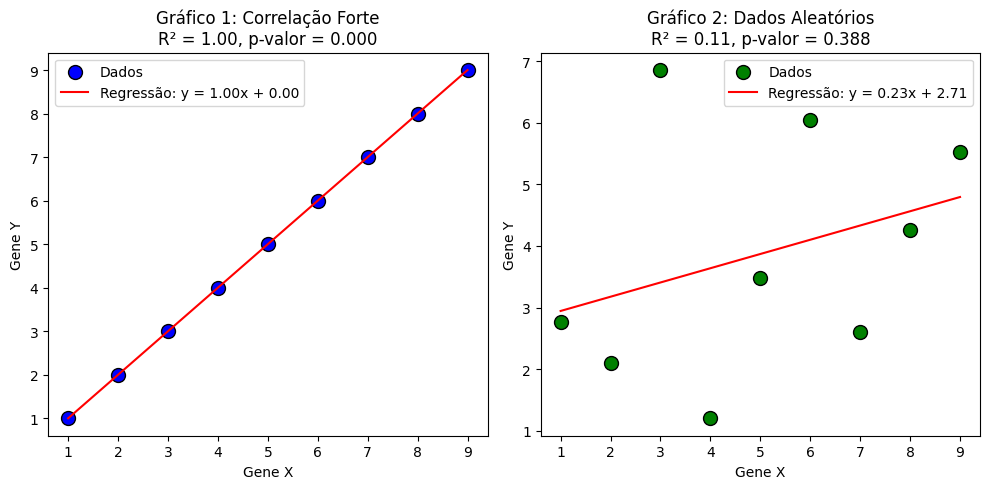

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Gerar dados para o primeiro gráfico (correlação positiva forte)
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Gerar dados para o segundo gráfico (dados aleatórios com distribuição uniforme)
x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y2 = np.random.uniform(1, 9, 9)

# Calcular a regressão linear para o primeiro gráfico
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)

# Calcular a regressão linear para o segundo gráfico
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Calcular a covariância entre os conjuntos de dados
covariance1 = np.cov(x1, y1)[0, 1]
covariance2 = np.cov(x2, y2)[0, 1]

# Exibir os resultados da regressão e covariância
print(f"# Gráfico 1 - Correlação Forte:")
print(f"Slope (Coeficiente angular): {slope1:.2f}")
print(f"Intercepto: {intercept1:.2f}")
print(f"R² (Coeficiente de Determinação): {r_value1**2:.2f}")
print(f"p-valor: {p_value1:.3f}")
print(f"Covariância: {covariance1:.2f}")
# Interpretação dos resultados
if p_value1 < 0.05:
    print(f"Para o Gráfico 1, a hipótese nula é rejeitada, indicando uma correlação significativa entre os dados.\n")
else:
    print(f"Para o Gráfico 1, a hipótese nula não é rejeitada, indicando que não há correlação significativa entre os dados.\n")

print(f"\n# Gráfico 2 - Dados Aleatórios:")
print(f"Slope (Coeficiente angular): {slope2:.2f}")
print(f"Intercepto: {intercept2:.2f}")
print(f"R² (Coeficiente de Determinação): {r_value2**2:.2f}")
print(f"p-valor: {p_value2:.3f}")
print(f"Covariância: {covariance2:.2f}")
# Interpretação dos resultados
if p_value2 < 0.05:
    print(f"Para o Gráfico 2, a hipótese nula é rejeitada, indicando uma correlação significativa entre os dados.\n")
else:
    print(f"Para o Gráfico 2, a hipótese nula não é rejeitada, indicando que não há correlação significativa entre os dados.\n")

# Plotando os gráficos, agora com os dados aparecendo como bolas (círculos)
plt.figure(figsize=(10, 5))

# Gráfico 1 - Correlação Forte com bolas
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color='blue', s=100, label='Dados', edgecolors='black')  # Dados em bolas
plt.plot(x1, slope1*x1 + intercept1, color='red', label=f'Regressão: y = {slope1:.2f}x + {intercept1:.2f}')
plt.title(f'Gráfico 1: Correlação Forte\nR² = {r_value1**2:.2f}, p-valor = {p_value1:.3f}')
plt.xlabel('Gene X')
plt.ylabel('Gene Y')
plt.legend()

# Gráfico 2 - Dados Aleatórios com bolas
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color='green', s=100, label='Dados', edgecolors='black')  # Dados em bolas
plt.plot(x2, slope2*x2 + intercept2, color='red', label=f'Regressão: y = {slope2:.2f}x + {intercept2:.2f}')
plt.title(f'Gráfico 2: Dados Aleatórios\nR² = {r_value2**2:.2f}, p-valor = {p_value2:.3f}')
plt.xlabel('Gene X')
plt.ylabel('Gene Y')
plt.legend()

# Exibir gráficos
plt.tight_layout()
plt.show()


## 🔹 Parte B - Estimando um Intervalo de Confiança para a Média

- Aplicar a técnica de cálculo de intervalo de confiança para a média de uma população com base em uma amostra de dados.
- Utilizar um conjunto amostral de emissões de CO2, será calculada:
 * a média amostral;
 * o desvio padrão;
 * os intervalos de confiança de 90%, 95% e 99%.

Média amostral = 283015.811
Desvio padrão amostral = 950930.668

90% IC: [57550.053, 508481.569]
95% IC: [12764.305, 553267.317]
99% IC: [-77389.235, 643420.857]


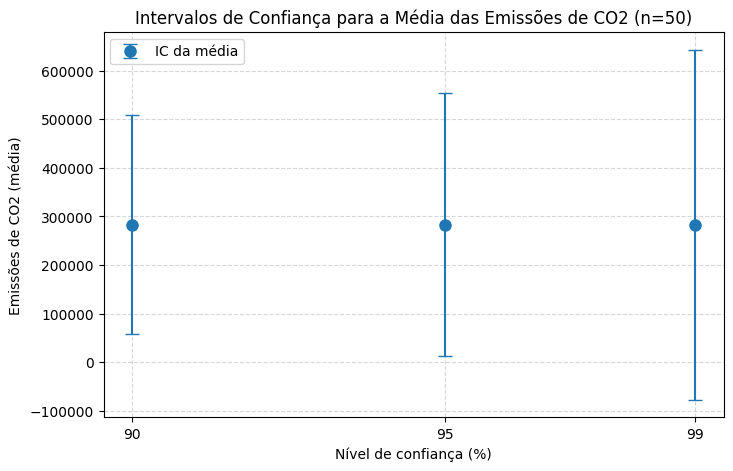

In [23]:
# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 2) Carregar o dataset de emissões de CO2
df_emissoes = pd.read_csv('/content/br_seeg_emissoes_brasil.csv')

# 3) Selecionar a variável de interesse e tirar uma amostra aleatória
np.random.seed(0)
n = 50  # tamanho da amostra
sample_emissao = df_emissoes["emissao"].sample(n=n)

# 4) Estatísticas básicas da amostra
x_bar = sample_emissao.mean()
s = sample_emissao.std(ddof=1)  # Desvio padrão amostral
print(f"Média amostral = {x_bar:.3f}")
print(f"Desvio padrão amostral = {s:.3f}\n")

# 5) Função para calcular IC via t-distribuição
def ic_t(sample_mean, sample_std, n, confidence=0.95):
    alpha = 1 - confidence
    df = n - 1
    t_crit = stats.t.ppf(1 - alpha/2, df)
    se = sample_std / np.sqrt(n)
    margin = t_crit * se
    return sample_mean - margin, sample_mean + margin

# 6) Calcular ICs para vários níveis
confs = [0.90, 0.95, 0.99]
results = []
for conf in confs:
    lower, upper = ic_t(x_bar, s, n, confidence=conf)
    results.append((conf, lower, upper))
    print(f"{int(conf*100)}% IC: [{lower:.3f}, {upper:.3f}]")

# 7) Montar DataFrame para plot
ic_df = pd.DataFrame(results, columns=["confidence", "lower", "upper"])
ic_df["mean"] = x_bar

# 8) Plotar
fig, ax = plt.subplots(figsize=(8, 5))

# pontos centrais
ax.errorbar(
    x=ic_df["confidence"]*100,      # 90, 95, 99
    y=ic_df["mean"],
    yerr=[ic_df["mean"] - ic_df["lower"], ic_df["upper"] - ic_df["mean"]],
    fmt='o',                         # marcador
    capsize=5,                       # “tampinhas” nas barras
    markersize=8,
    label="IC da média"
)

ax.set_xlabel("Nível de confiança (%)")
ax.set_ylabel("Emissões de CO2 (média)")
ax.set_title("Intervalos de Confiança para a Média das Emissões de CO2 (n=50)")
ax.set_xticks([90, 95, 99])
ax.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


## 🔹 Parte C - p-value em um Teste de Hipótese

- Aplicar o teste t de duas amostras para comparar dois grupos e avaliar se existe uma diferença significativa entre suas médias.

A partir dos dados amostrais, a atividade envolve calcular as estatísticas amostrais (média e desvio padrão), realizar o teste t e interpretar o p-valor resultante.

In [27]:
# Gerar dois conjuntos de dados amostrais
np.random.seed(42)

# Grupo de controle (notas de um grupo de controle)
controle = np.random.normal(loc=75, scale=10, size=50)  # Média 75, desvio padrão 10, 50 dados

# Grupo de teste (notas de um grupo de teste)
teste = np.random.normal(loc=78, scale=10, size=50)  # Média 78, desvio padrão 10, 50 dados

# Calcular as estatísticas amostrais
media_controle = np.mean(controle)
desvio_controle = np.std(controle, ddof=1)
media_teste = np.mean(teste)
desvio_teste = np.std(teste, ddof=1)

# Realizar o teste t de duas amostras
t_stat, p_value = stats.ttest_ind(controle, teste)

# Nível de significância
alpha = 0.05

# Interpretar o p-valor
rejeitar_H0 = p_value < alpha

# Exibir as estatísticas amostrais, teste t e a conclusão
print(f"Grupo de Controle:")
print(f"Média: {media_controle:.4f}")
print(f"Desvio padrão: {desvio_controle:.4f}\n")

print(f"Grupo de Teste:")
print(f"Média: {media_teste:.4f}")
print(f"Desvio padrão: {desvio_teste:.4f}\n")

print(f"Resultado do Teste t de Duas Amostras:")
print(f"Estatística t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}\n")

if rejeitar_H0:
    print("Conclusão: Rejeitamos a hipótese nula (H₀). Existe uma diferença significativa entre os grupos.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula (H₀). Não existe uma diferença significativa entre os grupos.")


Grupo de Controle:
Média: 72.7453
Desvio padrão: 9.3367

Grupo de Teste:
Média: 78.1778
Desvio padrão: 8.7432

Resultado do Teste t de Duas Amostras:
Estatística t: -3.0031
p-valor: 0.0034

Conclusão: Rejeitamos a hipótese nula (H₀). Existe uma diferença significativa entre os grupos.


##🔹 Parte D - Nível de Significância

 - Realizar uma simulação de testes de hipótese utilizando o teste t de duas amostras para entender o conceito de erro Tipo I e como o nível de significância (α) afeta a taxa de erro Tipo I.

 - Link dos Slides explicando o código abaixo e interpretando os resultados: [Atividade_4_ Programas-em-Python_(Apresentacao-Parte-D)](https://docs.google.com/presentation/d/1SUji7_Oo9OiELdYgQN9hNJy9HqlzrKNr7gHeyQfjfIU/edit?usp=sharing)

In [31]:
import numpy as np
from scipy.stats import ttest_ind

num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10

# Usar valores diferentes para significance_level
significance_levels = [0.01, 0.05, 0.10]

# Inicializar um dicionário para armazenar os resultados para cada significance_level
significant_results = {level: 0 for level in significance_levels}

for _ in range(num_simulations):
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    # Realizar o teste t
    t_stat, p_value = ttest_ind(group1, group2)

    # Verificar o p_value contra cada significance_level
    for level in significance_levels:
        if p_value < level:
            significant_results[level] += 1

# Calcular e imprimir a proporção de resultados significativos para cada significance_level
print(f"Number of simulations: {num_simulations}")
print("-" * 40) # Separador para melhor visualização

for level in significance_levels:
    proportion_significant = significant_results[level] / num_simulations
    print(f"--- Teste com Significance Level = {level} ---")
    print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")
    print("-" * 40) # Separador para melhor visualização

Number of simulations: 10000
----------------------------------------
--- Teste com Significance Level = 0.01 ---
Proportion of significant results (Type I error rate): 0.0087
----------------------------------------
--- Teste com Significance Level = 0.05 ---
Proportion of significant results (Type I error rate): 0.0481
----------------------------------------
--- Teste com Significance Level = 0.1 ---
Proportion of significant results (Type I error rate): 0.0974
----------------------------------------


## 🔹 Parte E - Reproduzindo Slides em Código

- Slides: [Intervalos de Confiança](https://docs.google.com/presentation/d/1gMKonLnK3buDUGGJGt1AAS-Ki3jT93LZ/edit?usp=sharing&ouid=106518696571208942024&rtpof=true&sd=true)

- Reproduzindo em Python o conteúdo dos slides de 24 a 46

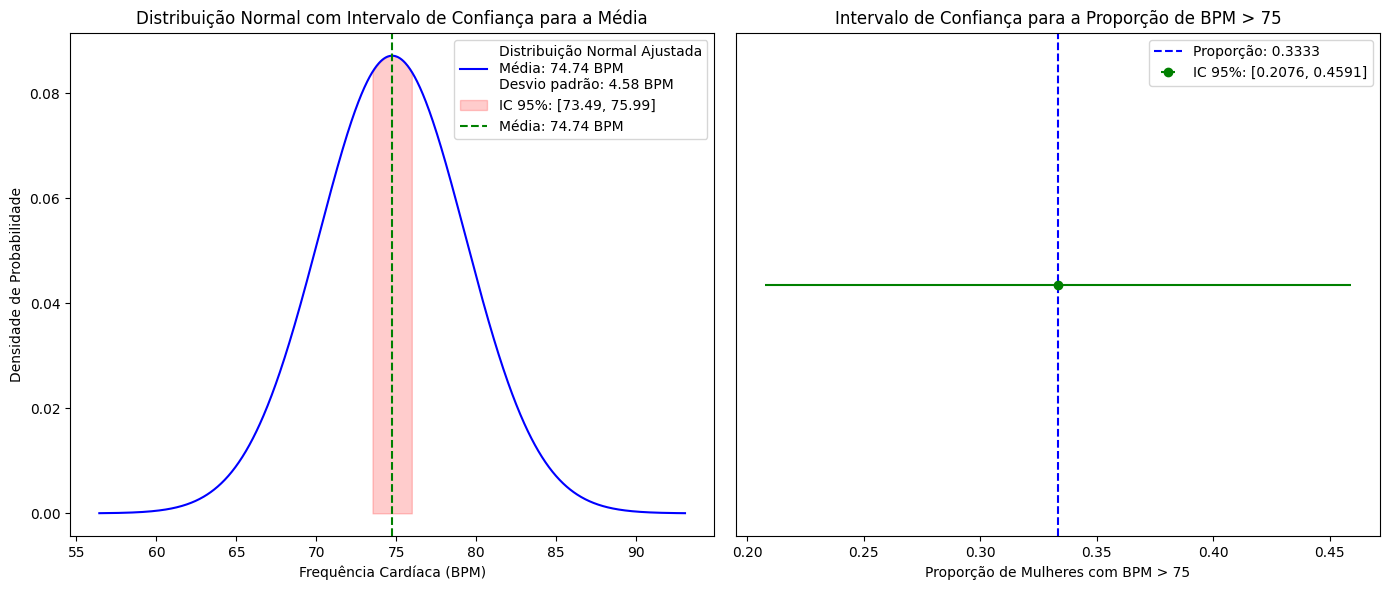

Valor crítico t para 95% de confiança (graus de liberdade = 53): 2.0057
Valor crítico z para 95% de confiança: 1.9600
Intervalo de Confiança para a Média (μ): [73.49, 75.99] BPM
Intervalo de Confiança para a Proporção (π): [0.2076, 0.4591]


In [40]:
# Calcular a média e o desvio padrão dos dados
mean_heart_rate = np.mean(heart_rate_data)  # Média dos dados
std_heart_rate = np.std(heart_rate_data, ddof=1)  # Desvio padrão dos dados

# Gerar valores para a distribuição normal (gaussiana) com base na média e desvio padrão
x_values = np.linspace(mean_heart_rate - 4 * std_heart_rate, mean_heart_rate + 4 * std_heart_rate, 1000)
y_values = (1 / (std_heart_rate * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean_heart_rate) / std_heart_rate) ** 2)

# Visualização dos intervalos de confiança e da distribuição normal
plt.figure(figsize=(14, 6))

# Gráfico 1: Intervalo de Confiança para a Média (μ) com Distribuição Gaussiana
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, color='blue', label=f'Distribuição Normal Ajustada\nMédia: {mean_heart_rate:.2f} BPM\nDesvio padrão: {std_heart_rate:.2f} BPM')
plt.fill_between(x_values, y_values, where=(x_values > lower_bound_mean) & (x_values < upper_bound_mean),
                 color='red', alpha=0.2, label=f'IC 95%: [{lower_bound_mean:.2f}, {upper_bound_mean:.2f}]')
plt.axvline(mean_heart_rate, color='green', linestyle='--', label=f'Média: {mean_heart_rate:.2f} BPM')
plt.title('Distribuição Normal com Intervalo de Confiança para a Média')
plt.xlabel('Frequência Cardíaca (BPM)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

# Gráfico 2: Intervalo de Confiança para a Proporção (π) com Distribuição Normal
plt.subplot(1, 2, 2)
plt.errorbar(p, 0, xerr=margin_of_error_proportion, fmt='o', color='green', label=f'IC 95%: [{lower_bound_proportion:.4f}, {upper_bound_proportion:.4f}]')
plt.axvline(p, color='blue', linestyle='--', label=f'Proporção: {p:.4f}')
plt.title('Intervalo de Confiança para a Proporção de BPM > 75')
plt.xlabel('Proporção de Mulheres com BPM > 75')
plt.yticks([])  # Remove os ticks do eixo y
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()

# Exibindo os valores críticos
print(f"Valor crítico t para 95% de confiança (graus de liberdade = {degrees_of_freedom}): {t_critical:.4f}")
print(f"Valor crítico z para 95% de confiança: {z_critical:.4f}")
print(f"Intervalo de Confiança para a Média (μ): [{lower_bound_mean:.2f}, {upper_bound_mean:.2f}] BPM")
print(f"Intervalo de Confiança para a Proporção (π): [{lower_bound_proportion:.4f}, {upper_bound_proportion:.4f}]")
